In [57]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [59]:
mymean = 100

In [60]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

(0, 12)

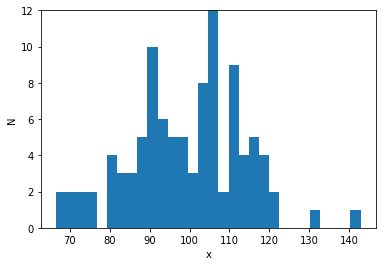

In [61]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
ylim(0,12) 

In [62]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))


Chisq mean: 99.22, standard deviation: 14.19


In [63]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


(0, 2000)

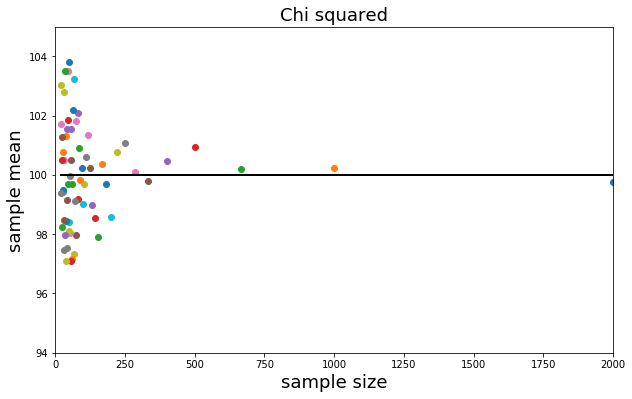

In [64]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

ylim(94,105)
xlim(0,2000)

Text(0,0.5,'N')

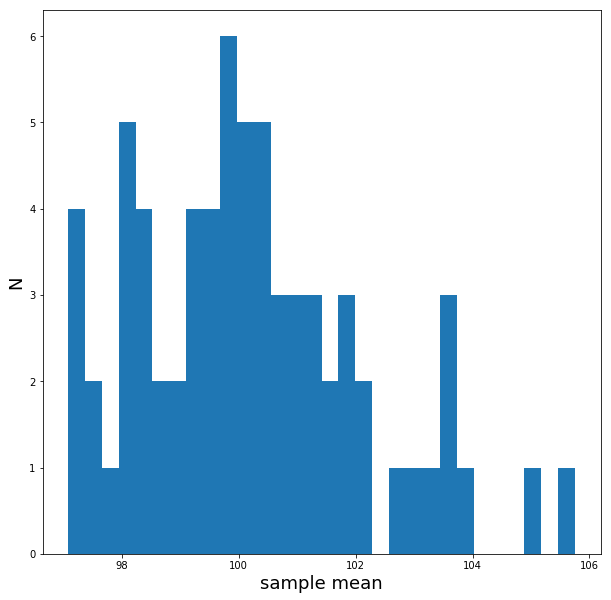

In [65]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# For the normal distribution 

In [66]:
distributions = ['gaus']

In [67]:
mymean = 100 

Text(0.5,0,'x')

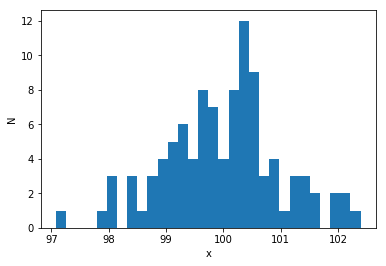

In [70]:
import numpy as np
md = {}
# md is an empty disctionary
md['gaus'] = np.random.normal (100,1,100)
# md now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [71]:
print ("Gauss mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))


Gauss mean: 99.99, standard deviation: 1.00


In [72]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)


[680 473 527 676 467 452 681 658 514 705 169   1 649 776 443 226 803 513
 645 856 567 816 699 876 378 602 776 440 973 844 594 233 422 773 182 408
 364 751 914 242 779 757 237 792 726 815 624 966 268  45  75  90 348   6
 453 911 594 934 752 351 531 422 530 476 780 333  74 375  27 866 643 811
 168 167 363 239 390 790 359 758 642 930 976 880 930  90 437  83 660 464
  35 562 379 258 709 993 674 692 449 562] (100,)


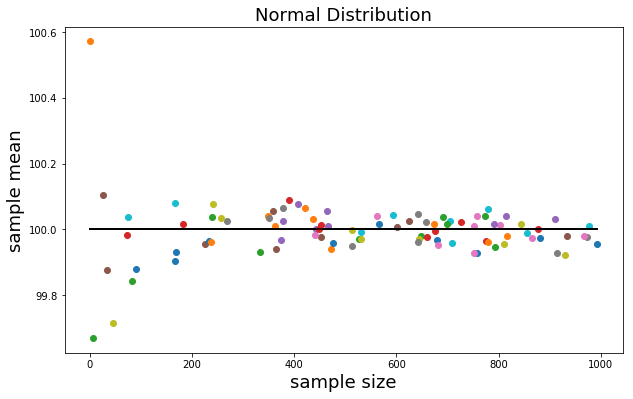

In [75]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gaus'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md['gaus']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


Text(0,0.5,'N')

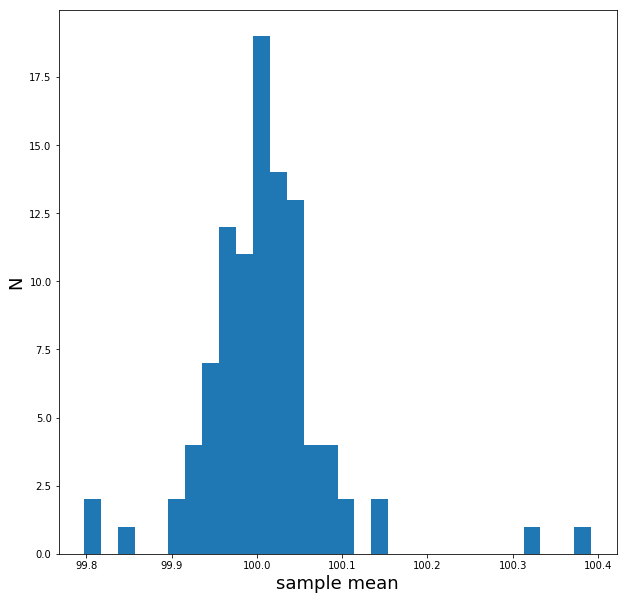

In [40]:
allmeans = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)


# For the Poisson Distribution 

In [78]:
distributions = ['pois']
mymean = 100

Text(0.5,0,'x')

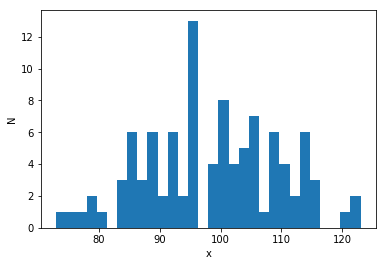

In [79]:
md = {}
# md is an empty disctionary
md['pois'] = np.random.poisson(100,100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [80]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 98.57, standard deviation: 10.87


In [87]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


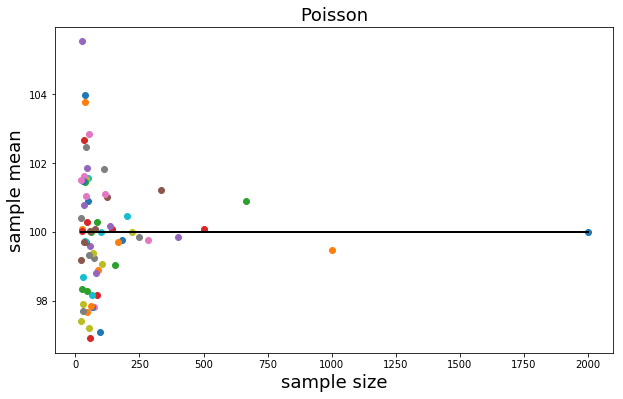

In [88]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

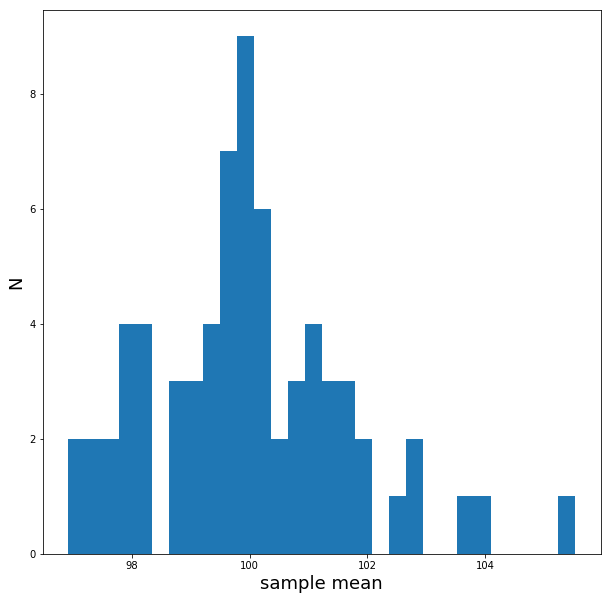

In [92]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Now for a binomial distribution 


In [93]:
distributions = ['binomial']
mymean = 100

Text(0.5,0,'x')

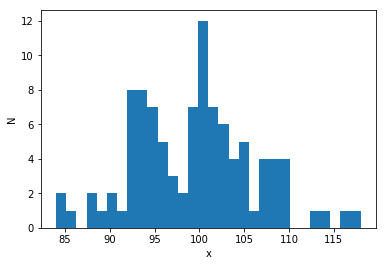

In [96]:
md = {}
# md is an empty disctionary
md['binomial'] = np.random.binomial(200,.5,100)
# md now is a dictionary with one object: an array by the key 'binomial'
#Setting n at 200 and p at .5 should get the same mean as the other distributions-100
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [98]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.42, standard deviation: 6.64


In [99]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


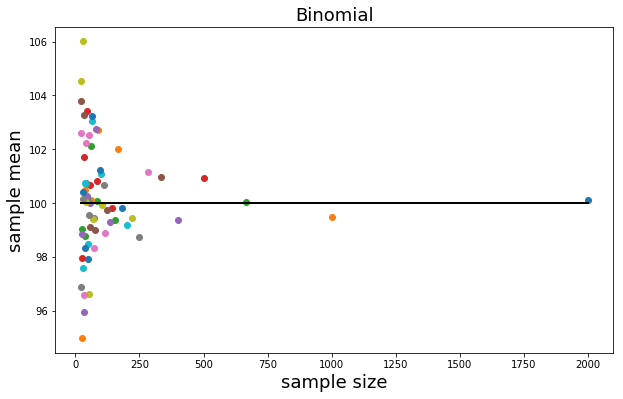

In [100]:
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


Text(0,0.5,'N')

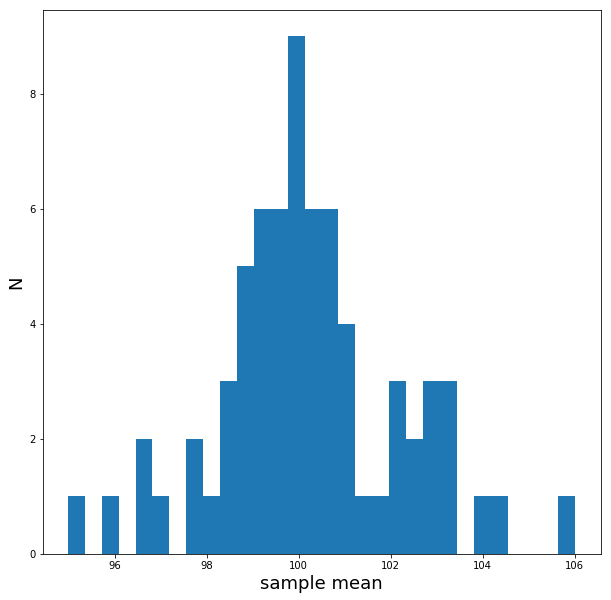

In [101]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Now an Exponential Distribution